# Importing Libraries

In [52]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
%matplotlib inline

# Importing Dataset

In [53]:
df=pd.read_csv('tel_churn.csv')

In [54]:
df

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84.80,1990.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103.20,7362.90,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29.60,346.45,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74.40,306.60,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [55]:
#Finding the unique values in the given Dataset
for cl in df:
    print(f'{cl} has: {df[cl].unique()}')

Unnamed: 0 has: [   0    1    2 ... 7040 7041 7042]
SeniorCitizen has: [0 1]
MonthlyCharges has: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges has: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn has: [0 1]
gender_Female has: [1 0]
gender_Male has: [0 1]
Partner_No has: [0 1]
Partner_Yes has: [1 0]
Dependents_No has: [1 0]
Dependents_Yes has: [0 1]
PhoneService_No has: [1 0]
PhoneService_Yes has: [0 1]
MultipleLines_No has: [0 1]
MultipleLines_No phone service has: [1 0]
MultipleLines_Yes has: [0 1]
InternetService_DSL has: [1 0]
InternetService_Fiber optic has: [0 1]
InternetService_No has: [0 1]
OnlineSecurity_No has: [1 0]
OnlineSecurity_No internet service has: [0 1]
OnlineSecurity_Yes has: [0 1]
OnlineBackup_No has: [0 1]
OnlineBackup_No internet service has: [0 1]
OnlineBackup_Yes has: [1 0]
DeviceProtection_No has: [1 0]
DeviceProtection_No internet service has: [0 1]
DeviceProtection_Yes has: [0 1]
TechSupport_No has: [1 0]
TechSupport_No internet service h

In [56]:
#finding if any null can found in the given dataset
df.isna().sum()

Unnamed: 0                                 0
SeniorCitizen                              0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

# Scaling Dataset

In [58]:
from sklearn.preprocessing import MinMaxScaler
colToScale=["MonthlyCharges","TotalCharges"]
scaler=MinMaxScaler()
df[colToScale]=scaler.fit_transform(df[colToScale])

In [59]:
print("After Scaling the values:\n")
print(df["MonthlyCharges"],"\n",df["TotalCharges"])

After Scaling the values:

0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7027    0.662189
7028    0.845274
7029    0.112935
7030    0.558706
7031    0.869652
Name: MonthlyCharges, Length: 7032, dtype: float64 
 0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7027    0.227521
7028    0.847461
7029    0.037809
7030    0.033210
7031    0.787641
Name: TotalCharges, Length: 7032, dtype: float64


# Train Test Splitting

In [60]:
y=df["Churn"]
df.drop('Churn', axis="columns", inplace=True)

In [61]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [62]:
x=df.iloc[:,1:-1]

In [63]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60
0,0,0.115423,0.001275,1,0,0,1,1,0,1,...,1,0,0,1,0,1,0,0,0,0
1,0,0.385075,0.215867,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0.354229,0.010310,0,1,1,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
3,0,0.239303,0.210241,0,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0,0.521891,0.015330,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0.662189,0.227521,0,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
7028,0,0.845274,0.847461,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0
7029,0,0.112935,0.037809,1,0,0,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
7030,1,0.558706,0.033210,0,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2, random_state=0)

In [69]:
print("No.of columns: ",len(xtrain.columns))
print(len(xtrain), len(ytrain))

No.of columns:  49
5625 5625


# DEV Neural Network

In [74]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(49,), activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(xtrain, ytrain, epochs=100)

C:\Program Files\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7126 - loss: 0.5422
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7891 - loss: 0.4225
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7994 - loss: 0.4228
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 0.4068
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8030 - loss: 0.4058
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8128 - loss: 0.3972
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.4131
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.4108
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8087 - loss: 0.4010
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.4081
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7992 - loss: 0.4171
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

# Model Prediction and Evaluation

In [75]:
model.evaluate(xtest, ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7895 - loss: 0.6417


[0.641284704208374, 0.7761194109916687]

In [76]:
predict = model.predict(xtest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [112]:
prediction=[]
for i in predict:
    if i<0.5:
        prediction.append(0)
    else:
        prediction.append(1)

# Confusion Matrix & Classification Report

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

In [115]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1038
           1       0.59      0.48      0.53       369

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



# Making Data Visulization

In [116]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

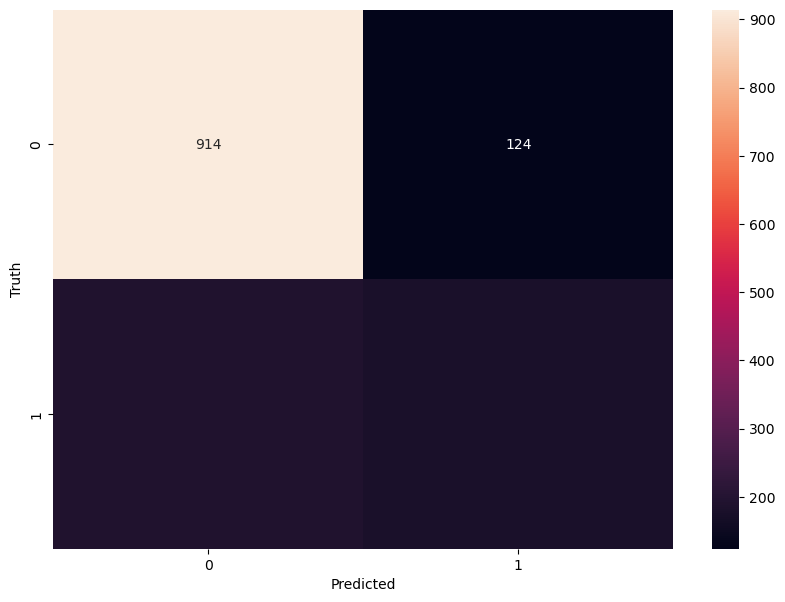

In [122]:
confusion_matrix=tf.math.confusion_matrix(ytest, predictions=prediction)
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")